In [64]:
# 1.Download the dataset.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 2. Load the dataset.

In [5]:
data=pd.read_csv(r'E:\Mall_Customers.csv')

In [76]:
data.head();

In [7]:
# 3. Perform Below Visualizations.

In [8]:
# 1. Univariate Analysis.

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

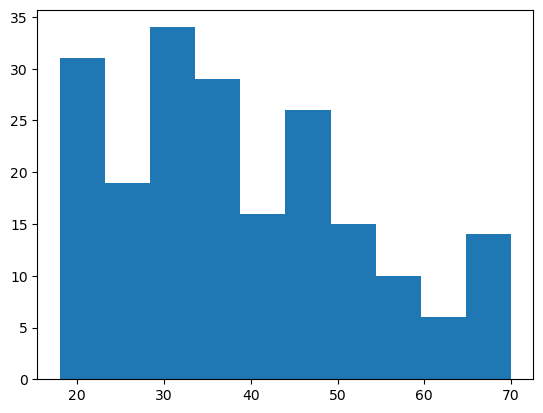

In [66]:
plt.hist(data['Age'])

In [10]:
# 2. Bi- Variate Analysis.

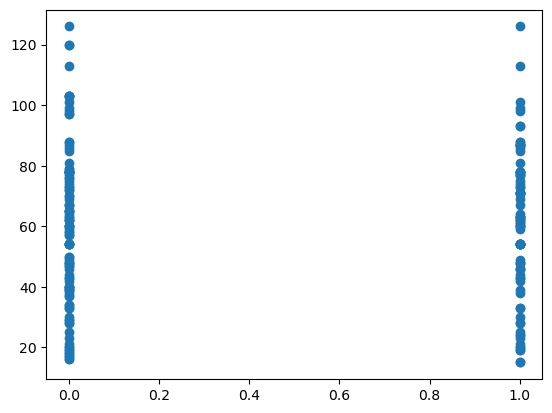

In [77]:
plt.scatter(data['Gender'],data['Annual Income (k$)'])

In [12]:
# 3. Multi-Variate Analysis

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>,
        <AxesSubplot:xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>]],
      dtype=object)

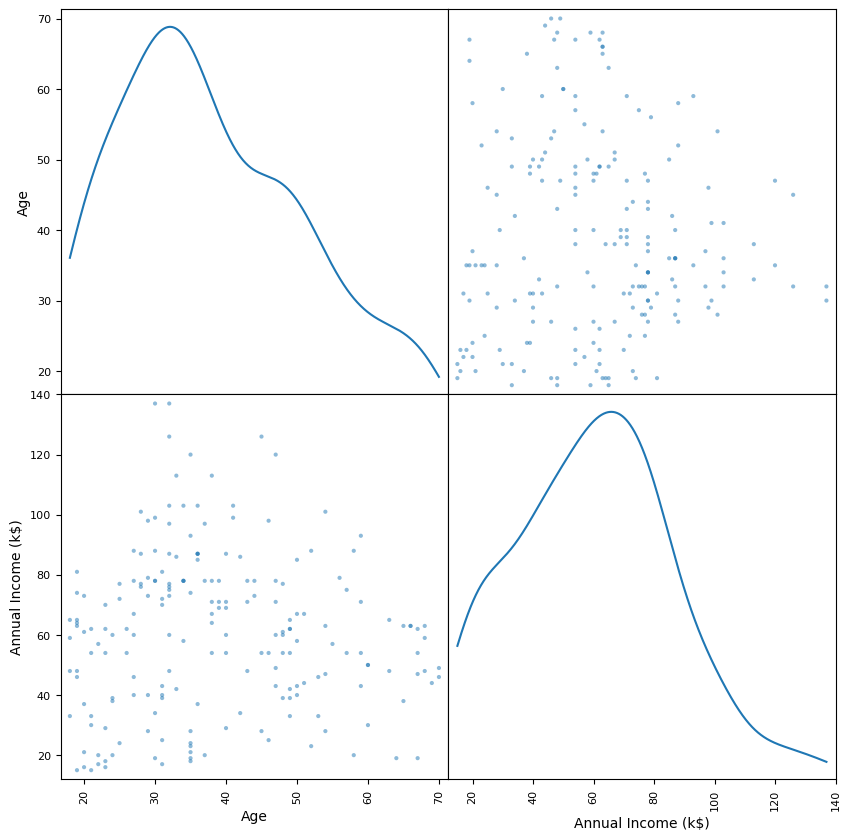

In [13]:
pd.plotting.scatter_matrix(data.loc[:,"Age":"Annual Income (k$)"] , diagonal ="kde", figsize=(10,10))

In [14]:
# 4. Perform descriptive statistics on the dataset.

In [67]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,0.440000,38.850000,59.790000,50.200000,2.51000
std,57.879185,0.497633,13.969007,25.110127,25.823522,1.81005
min,1.000000,0.000000,18.000000,15.000000,1.000000,0.00000
25%,50.750000,0.000000,28.750000,41.500000,34.750000,1.00000
50%,100.500000,0.000000,36.000000,60.500000,50.000000,2.50000
75%,150.250000,1.000000,49.000000,77.250000,73.000000,4.00000
max,200.000000,1.000000,70.000000,126.000000,99.000000,5.00000


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [17]:
# 5. Check for Missing values and deal with them.

In [18]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
# 6. Find the outliers and replace them outliers.

<AxesSubplot:xlabel='CustomerID'>

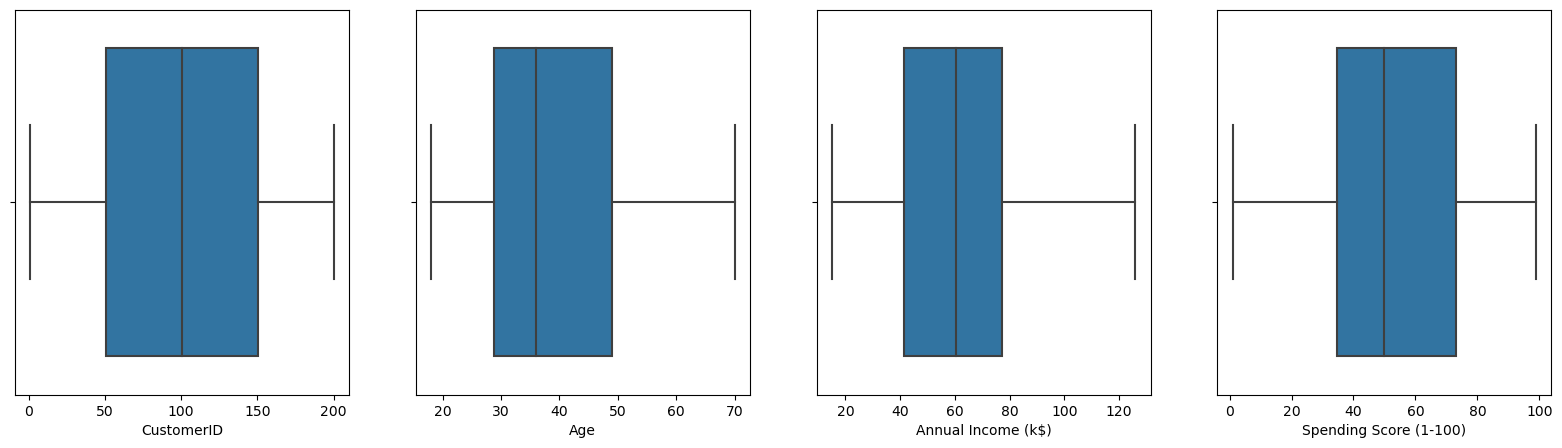

In [68]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 5, 2)
sns.boxplot(x=data['Age'])

plt.subplot(1, 5, 3)
sns.boxplot(x=data['Annual Income (k$)'])

plt.subplot(1, 5, 4)
sns.boxplot(x=data['Spending Score (1-100)'])

plt.subplot(1, 5, 1)
sns.boxplot(x=data['CustomerID'])

In [21]:
# Handling outlier.

In [22]:
quant=data.quantile(q=[0.25,0.75])
quant

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [23]:
quant.loc[0.75]

CustomerID                150.25
Age                        49.00
Annual Income (k$)         78.00
Spending Score (1-100)     73.00
Name: 0.75, dtype: float64

In [78]:
quant.loc[0.25]

CustomerID                50.75
Age                       28.75
Annual Income (k$)        41.50
Spending Score (1-100)    34.75
Name: 0.25, dtype: float64

In [25]:
iqr=quant.loc[0.75]-quant.loc[0.25]
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [69]:
low=quant.loc[0.25]-(1.5 *iqr)
low

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [79]:
up=quant.loc[0.75]+(1.5 *iqr)
up

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [28]:
data['Annual Income (k$)']= np.where(data['Annual Income (k$)']>132,60,data['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)'>

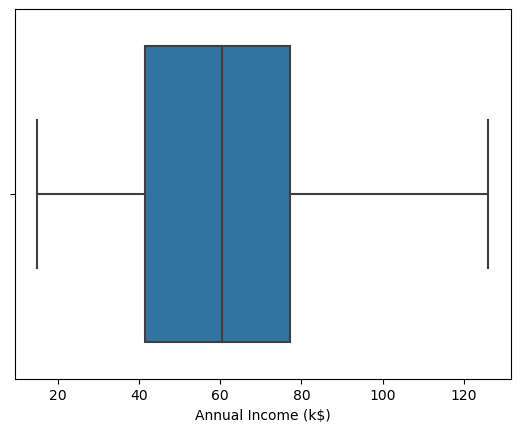

In [29]:
sns.boxplot(x=data['Annual Income (k$)'])

In [30]:
# 7. Check for Categorical columns and perform encoding.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   clust                   200 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 8.7 KB


In [32]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [70]:
data['Gender'].replace({'Male':1,"Female":0},inplace=True)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,1,19,15,39,1
1,2,1,21,15,81,4
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,2
197,198,1,32,126,74,3
198,199,1,32,60,18,2


In [34]:
# 8. Scaling the data.

In [81]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df=sc.fit_transform(data.iloc[:,1:])
df

array([[1.        , 0.01923077, 0.        , 0.3877551 , 0.2       ],
       [1.        , 0.05769231, 0.        , 0.81632653, 0.8       ],
       [0.        , 0.03846154, 0.00900901, 0.05102041, 0.2       ],
       [0.        , 0.09615385, 0.00900901, 0.7755102 , 0.8       ],
       [0.        , 0.25      , 0.01801802, 0.39795918, 0.2       ],
       [0.        , 0.07692308, 0.01801802, 0.76530612, 0.8       ],
       [0.        , 0.32692308, 0.02702703, 0.05102041, 0.2       ],
       [0.        , 0.09615385, 0.02702703, 0.94897959, 0.8       ],
       [1.        , 0.88461538, 0.03603604, 0.02040816, 0.2       ],
       [0.        , 0.23076923, 0.03603604, 0.7244898 , 0.8       ],
       [1.        , 0.94230769, 0.03603604, 0.13265306, 0.2       ],
       [0.        , 0.32692308, 0.03603604, 1.        , 0.8       ],
       [0.        , 0.76923077, 0.04504505, 0.14285714, 0.2       ],
       [0.        , 0.11538462, 0.04504505, 0.7755102 , 0.8       ],
       [1.        , 0.36538462, 0.

In [36]:
# 9. Perform any of the clustering algorithms.

In [38]:
from sklearn.cluster import KMeans
abc=[]
k=list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    abc.append(kmeans.inertia_)
abc

[381550.6840684068,
 268120.09151138715,
 191604.87350427354,
 153394.66603206733,
 119217.23746732261,
 101388.39788480639,
 85819.8934588803]

Text(0, 0.5, 'TWSS')

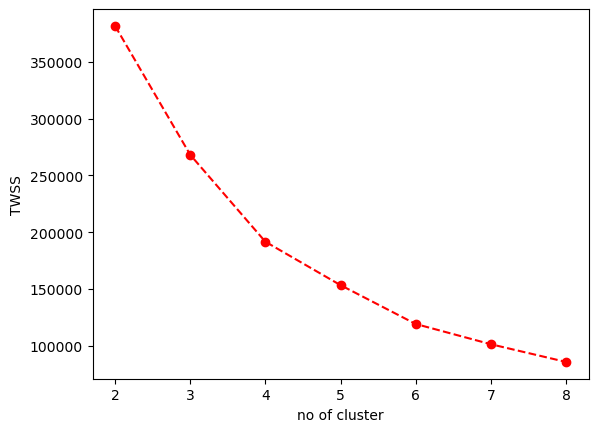

In [39]:
plt.plot(k,abc,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [41]:
model=KMeans(n_clusters=6)

model.fit(data)

KMeans(n_clusters=6)

In [42]:
model.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0,
       0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0,
       0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [43]:
mb=pd.Series(model.labels_)

In [44]:
data.head(8)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94


In [45]:
# 10. Add the cluster data with the primary dataset.

In [46]:
data['clust']=mb
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,1,19,15,39,1
1,2,1,21,15,81,4
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,1


In [75]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
195,196,0,35,120,79,3
196,197,0,45,126,28,2
197,198,1,32,126,74,3
198,199,1,32,60,18,2
199,200,1,30,60,83,3


In [48]:
# 11. Split the data into dependent and independent variables.

In [49]:
y= data['clust']
y

0      1
1      4
2      1
3      4
4      1
      ..
195    3
196    2
197    3
198    2
199    3
Name: clust, Length: 200, dtype: int32

In [71]:
x= data.drop(columns=['CustomerID','clust'],axis=1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [74]:
x.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,60,18
199,1,30,60,83


In [52]:
# 12. Split the data into training and testing.

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [54]:
# 13. Build the Model.

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [56]:
# 14. Train the Model.

In [57]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
# 15. Test the Model.

In [59]:
pred=rf.predict(x_test)

In [60]:
# 16. Measure the performance using Evaluvation Metrics.

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.975

In [73]:
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[7, 0, 0, 1, 0, 0],
       [0, 6, 0, 0, 0, 0],
       [0, 0, 8, 0, 0, 0],
       [0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 6]], dtype=int64)